In [2]:
import numpy as np
import pandas as pd

In [3]:
def find_differences_in_timestamp(df1, df2, name_timstamp1, name_timstamp2):
    if not name_timstamp1 in df1.columns:
        raise Exception("'timestamp' column not found in df1")
    if not name_timstamp2 in df2.columns:
        raise Exception("'timestamp' column not found in df2")

    if len(df1) != len(df2):
        print(len(df1))
        print(len(df2))
        raise Exception(
            f"df1 and df2 have different lengths ({len(df1)}, {len(df2)})")

    t1 = df1[name_timstamp1].values
    t2 = df2[name_timstamp2].values

    t1_sorted = np.sort(t1)
    t2_sorted = np.sort(t2)

    df = pd.DataFrame({
        "t1": t1_sorted,
        "t2": t2_sorted
    })

    df["diff"] = df["t1"] != df["t2"]


    df["hour"] = df["t1"].apply(lambda x: x[11:13])
    df["day"] = df["t1"].apply(lambda x: x[8:10])
    df["month"]=df["t1"].apply(lambda x: x[5:7])
    df["year"]=df["t1"].apply(lambda x: x[0:4])



    return df

In [4]:
df1=pd.read_csv('data/processed/bpic15_time_manipulated.csv')
df2=pd.read_csv('bpic15_amended_typed.csv')

df1['time:timestamp'] = df1['time:timestamp'].str.slice(stop=-6)

df1.head()
df2.head()


,Unnamed: 0.1,Unnamed: 0,Case ID,activity,Resource,Complete Timestamp,ct:last_phase,case_parts,Activity,r:municipality,ct:permit_type,at:phase,tt:month,tt:day,tt:weekday,tt:ampm,CT,AT,TT,CO
0,0,0,4284682,enter senddate procedure confirmation,560852,2009-11-18 09:00:00,Besluit genomen,"Bouw,Sloop",01_HOOFD_190_2,muni-4,Bouw,01_HOOFD_1,Nov,Day_18,Wed,AM,NaN,0-1-4-5,M-T-W-T-F,null/0-1-4-5/M-T-W-T-F
1,1,1,4511735,register submission date request,1254625,2009-11-23 09:00:00,Vergunning onherroepelijk,Brandveilig gebruik (vergunning),01_HOOFD_010,muni-5,Non Bouw,01_HOOFD_0,Nov,Day_23,Mon,AM,NaN,0-1-4-5,M-T-W-T-F,null/0-1-4-5/M-T-W-T-F
2,2,2,3090877,enter senddate procedure confirmation,3148844,2010-01-01 09:00:00,Vergunning verleend,Milieu (vergunning),01_HOOFD_065_2,muni-3,Non Bouw,01_HOOFD_0,Jan,Day_1,Fri,AM,NaN,0-1-4-5,M-T-W-T-F,null/0-1-4-5/M-T-W-T-F
3,3,4,3871304,date for inspection MER,560532,2010-06-29 08:00:00,Procedure afgebroken,Milieu (vergunning),01_HOOFD_080,muni-2,Non Bouw,01_HOOFD_0,Jun,Day_29,Tue,AM,NaN,0-1-4-5,M-T-W-T-F,null/0-1-4-5/M-T-W-T-F
4,4,6,3007101,register submission date request,560749,2010-10-04 08:00:00,Aanvraag ontvangen,Milieu (vergunning),01_HOOFD_010,muni-3,Non Bouw,01_HOOFD_0,Oct,Day_4,Mon,AM,NaN,0-1-4-5,M-T-W-T-F,null/0-1-4-5/M-T-W-T-F


In [5]:
diff = find_differences_in_timestamp(df1, df2, "time:timestamp", "Complete Timestamp")

diff[diff["diff"] == True]

diffs=diff[diff["diff"] == True]

diffs.describe()
diffs.head()

diffs.month.unique()
diffs.head()


,t1,t2,diff,hour,day,month,year


In [6]:
df1 = pd.read_csv('data/processed/bpic15.csv')
df2 = pd.read_csv('bpic15_amended_typed.csv')

t1 = df1['time:timestamp']
t2 = df2['Complete Timestamp']

t1_sorted = np.sort(t1)
#remove last 6 characters of t1_sorted
t1_sorted = [x[:-6] for x in t1_sorted]

t2_sorted = np.sort(t2)

df = pd.DataFrame({
    "t1": t1_sorted,
    "t2": t2_sorted})

t1_sorted

#change string to datetime in df1["t1"]
df["t1"] = pd.to_datetime(df["t1"], format='%Y-%m-%d %H:%M:%S')

# change string to datetime in df1["t2"]
df["t2"] = pd.to_datetime(df["t2"], format='%Y-%m-%d %H:%M:%S')

df["diff"] = df["t1"] - df["t2"]
# get df["diff"] as hours
df["diff"] = df["diff"].dt.total_seconds() / 3600

df

df["diff"].describe()


count    193453.0
mean        -10.0
std           0.0
min         -10.0
25%         -10.0
50%         -10.0
75%         -10.0
max         -10.0
Name: diff, dtype: float64

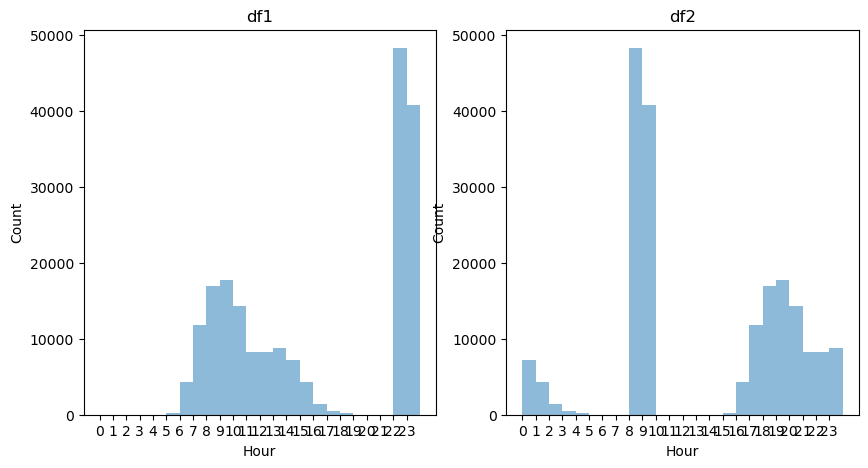

In [17]:
import matplotlib.pyplot as plt

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# Get hour of df1
df1["hour"] = df1["time:timestamp"].apply(lambda x: int(x[11:13]))

# Get hour of df2
df2["hour"] = df2["Complete Timestamp"].apply(lambda x: int(x[11:13]))

# Plot the histogram for df1
ax1.hist(df1["hour"], bins=range(25), alpha=0.5)

# Set the x-axis labels to show all bins
ax1.set_xticks(range(24))

# Add a title and axis labels for subplot 1
ax1.set_title("df1")
ax1.set_xlabel("Hour")
ax1.set_ylabel("Count")

# Plot the histogram for df2
ax2.hist(df2["hour"], bins=range(25), alpha=0.5)

# Set the x-axis labels to show all bins
ax2.set_xticks(range(24))

# Add a title and axis labels for subplot 2
ax2.set_title("df2")
ax2.set_xlabel("Hour")
ax2.set_ylabel("Count")

# Show the plot
plt.show()
